In [39]:
from scipy import spatial
import scipy.misc as sp
from PIL import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.dpi'] = 300

In [ ]:
# def find_seq(start_pts, trans_peaks):
#     start_x, start_y = start_pts


In [40]:
def count_pairs(ref_coord, target_coord, radius):
    tree = spatial.KDTree(ref_coord)
    res, idx = tree.query(target_coord, k=1)
    pairs = 0
    pp = 0
    for i in idx:
        if res[pp] < radius:
            pairs += 1
        pp += 1
    return pairs

[0, 0, 2, 7, 7, 9, 13, 18, 26, 33, 43, 50, 66, 86, 101, 114, 121, 147, 160, 176, 188, 209, 228, 244, 260, 275, 284, 299, 322, 338, 351, 356, 370, 381, 394, 407, 419, 439, 451, 464, 476, 485, 497, 507, 515, 521, 525, 532, 539, 545, 553, 564, 570, 578, 580, 583, 587, 597, 601, 607, 609, 612, 614, 616, 620, 624, 624, 624, 624, 624, 627, 630, 632, 633, 634, 634, 635, 636, 637, 639, 639, 640, 641, 643, 647, 647, 647, 647, 649, 650, 650, 650, 650, 650, 650, 652, 652, 652, 652, 652]
[0, 0, 1, 6, 12, 16, 23, 28, 43, 61, 68, 95, 118, 141, 163, 187, 208, 222, 249, 272, 289, 306, 332, 355, 369, 385, 403, 427, 444, 460, 474, 489, 500, 508, 517, 534, 550, 556, 567, 569, 577, 585, 589, 594, 600, 602, 604, 608, 610, 614, 619, 619, 623, 626, 627, 629, 632, 633, 633, 633, 634, 635, 635, 635, 638, 640, 641, 641, 641, 644, 646, 646, 646, 646, 646, 647, 648, 648, 648, 649, 649, 650, 650, 650, 651, 652, 652, 653, 653, 653, 653, 653, 653, 654, 655, 656, 656, 656, 656, 656]


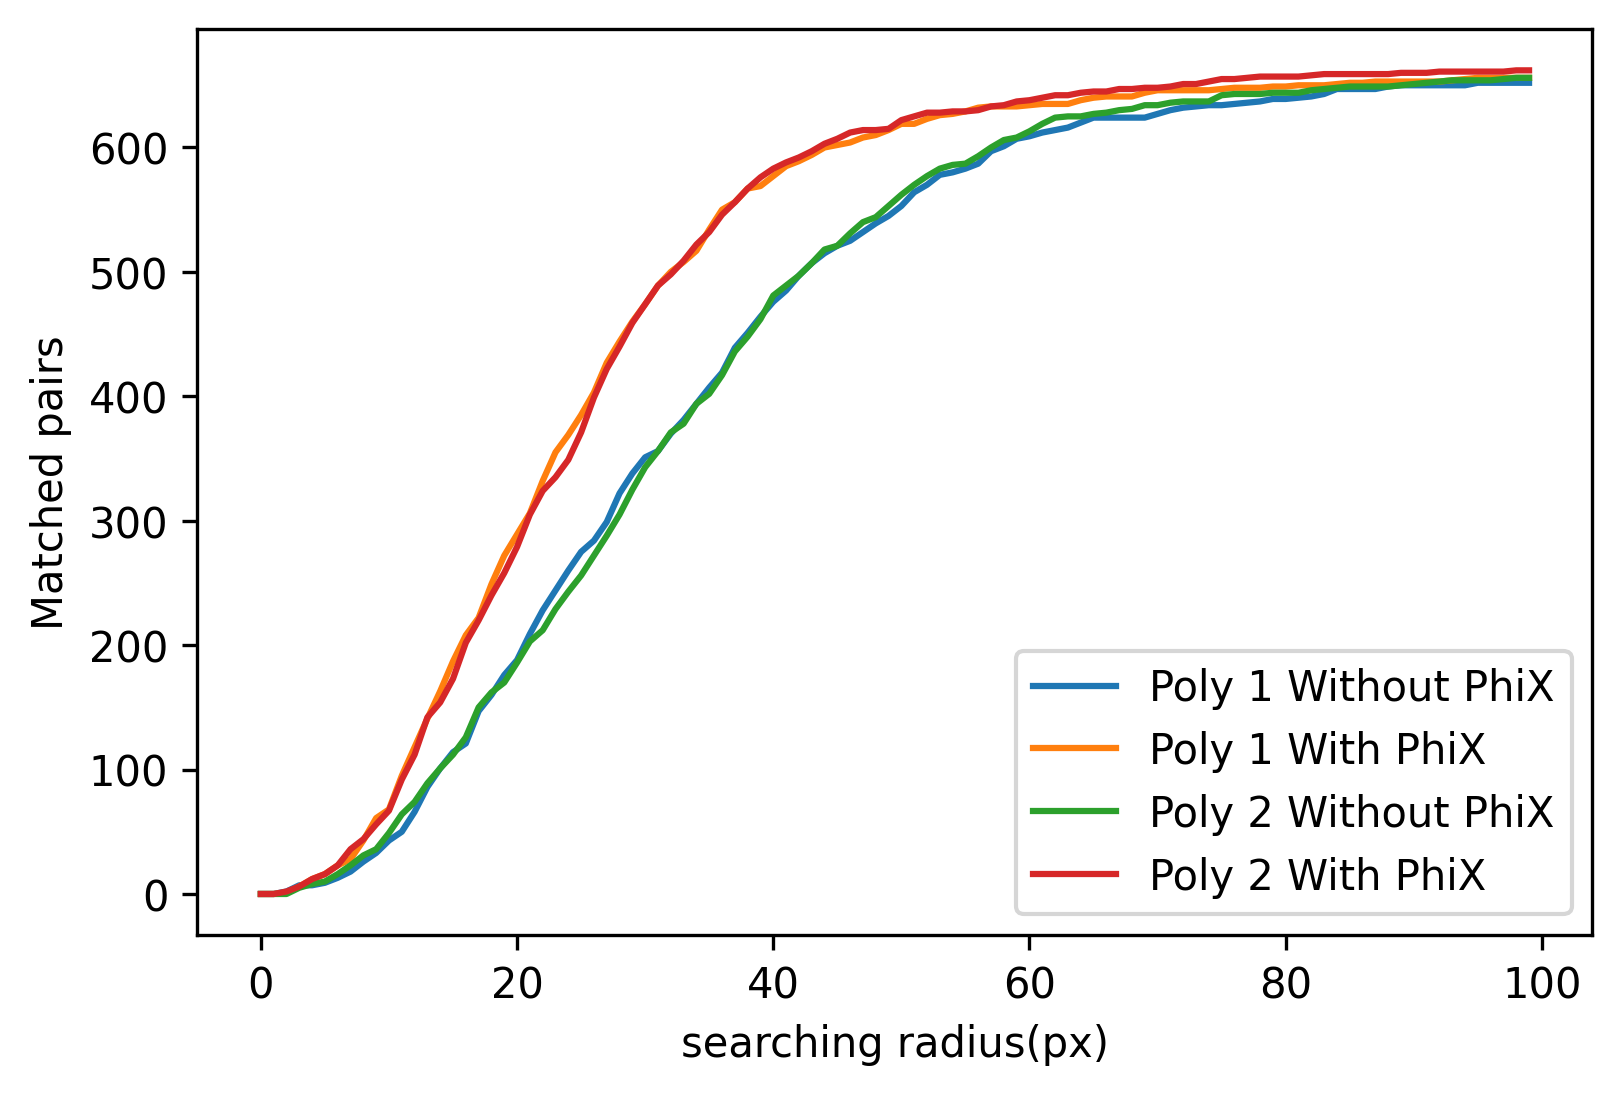

In [46]:
def read_coord(csv_path):
    res_tb = pd.read_csv(csv_path)
    pts = np.column_stack((np.array(res_tb['Y'][0:len(res_tb)]), np.array(res_tb['X'][0:len(res_tb)])))
    return pts

fastq = read_coord('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/coord_fastq.csv')
poly1 = read_coord('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/coord_poly1.csv')
poly2 = read_coord('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/coord_poly2.csv')
# poly1 = read_coord('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/coord_nn.csv')
phix = read_coord('/Users/qinhanhou/Desktop/DeindlLab/0729Poly/0808/coord_phix.csv')
# print(fastq)
pairs_lib = []
pairs_phix = []
pairs_lib_poly2 = []
pairs_phix_poly2 = []
max_radius = 100
for i in range(0, max_radius):
    # print("Radius: " + str(i))
    pairs_lib.append(count_pairs(fastq, poly1, i))
    pairs_phix.append(count_pairs(phix, poly1, i))
    pairs_lib_poly2.append(count_pairs(fastq, poly2, i))
    pairs_phix_poly2.append(count_pairs(phix, poly2, i))
    # print('=====================')
print(pairs_lib)
print(pairs_phix)
plt.figure()
plt.plot(range(0, max_radius), np.array(pairs_lib), label='Poly 1 Without PhiX')
plt.plot(range(0, max_radius), np.array(pairs_phix), label='Poly 1 With PhiX')
plt.plot(range(0, max_radius), np.array(pairs_lib_poly2), label='Poly 2 Without PhiX')
plt.plot(range(0, max_radius), np.array(pairs_phix_poly2), label='Poly 2 With PhiX')
plt.legend()
plt.xlabel('searching radius(px)')
plt.ylabel('Matched pairs')
plt.show()
